# Life Expectancy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datasets/Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.columns  = [x.strip()  for x in df.columns]

In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [23]:
df_2 = df[["Year","Country","Life expectancy", "Alcohol", "Schooling", "GDP", "BMI", "Population"]].copy()

In [24]:
df_2.head()

,Year,Country,Life expectancy,Alcohol,Schooling,GDP,BMI,Population
0,2015,Afghanistan,65.0,0.01,10.1,584.259210,19.1,33736494.0
1,2014,Afghanistan,59.9,0.01,10.0,612.696514,18.6,327582.0
2,2013,Afghanistan,59.9,0.01,9.9,631.744976,18.1,31731688.0
3,2012,Afghanistan,59.5,0.01,9.8,669.959000,17.6,3696958.0
4,2011,Afghanistan,59.2,0.01,9.5,63.537231,17.2,2978599.0


<Axes: xlabel='Life expectancy', ylabel='Frequency'>

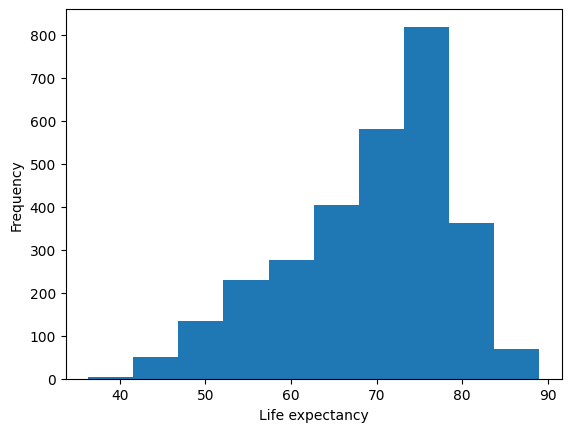

In [9]:
df_2["Life expectancy"].plot.hist(xlabel="Life expectancy")

In [10]:

df_2.sort_values("Life expectancy", inplace=True)
df_2.dropna(inplace=True)


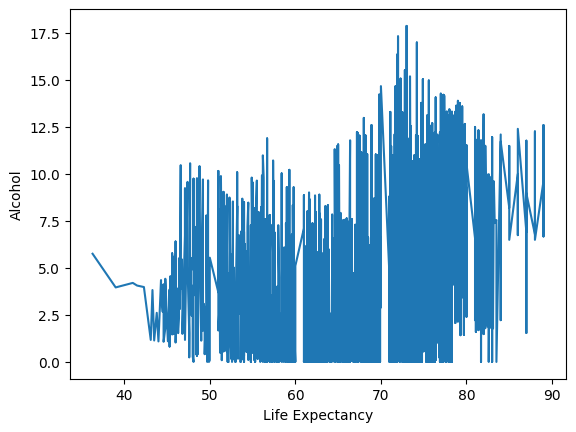

In [11]:
fig, axes = plt.subplots()
axes.plot(df_2["Life expectancy"], df_2["Alcohol"])
axes.set_xlabel("Life Expectancy")
axes.set_ylabel("Alcohol")

plt.show()

In [12]:
def plot_life(df, xlabel, ylabel):
    fig, axes = plt.subplots()

    axes.plot(df[xlabel], df[ylabel])
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")
    plt.show()

## On sample

In [13]:
sample_df = df_2.sample(frac= 0.30)
sample_df.sort_values("Life expectancy", inplace=True)

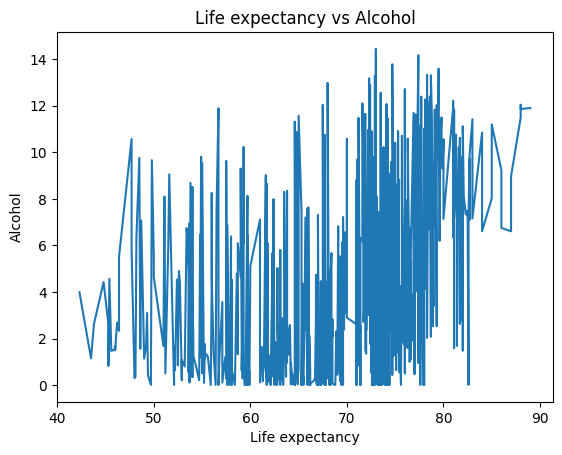

In [14]:
plot_life(sample_df, "Life expectancy", "Alcohol")

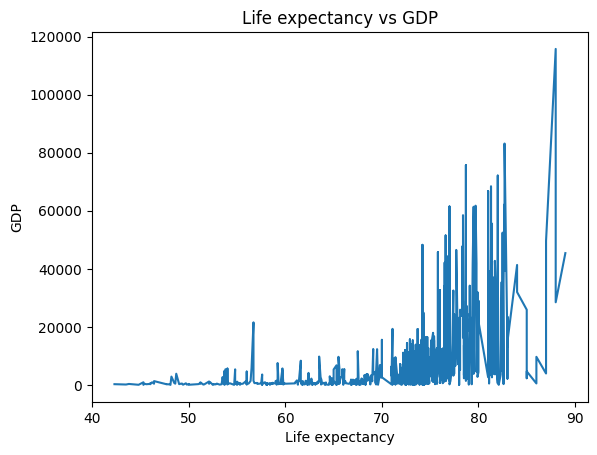

In [15]:
# gdp vs life expectancy
plot_life(sample_df, "Life expectancy", "GDP")

In [58]:
df_2[["Alcohol", "GDP"]].apply("mean")

Alcohol       4.609922
GDP        7597.285952
dtype: float64

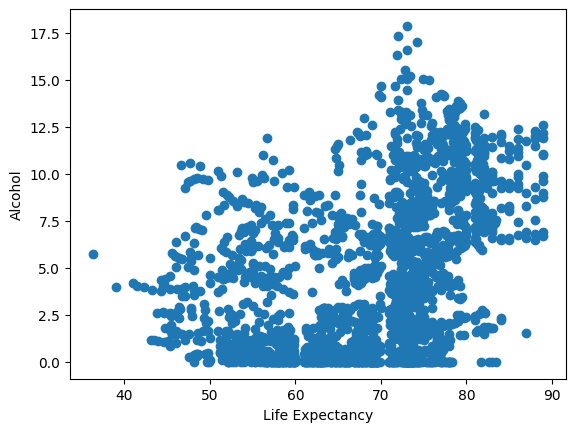

In [17]:
fig, axes = plt.subplots()

axes.scatter(df_2["Life expectancy"], df_2["Alcohol"])
axes.set_xlabel("Life Expectancy")
axes.set_ylabel("Alcohol")

plt.show()

In [19]:
df_2["Alcohol"].corr(df_2["Life expectancy"])

0.38356899608913103

In [43]:
def plot_scatter(x,y,xlabel,ylabel,ax):
    ax.scatter(x, y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

def plot_hist(x, xlabel,  ax):
    ax.hist(x)
    ax.set_ylabel(f"Frequency of {xlabel}")
    ax.set_xlabel(xlabel)

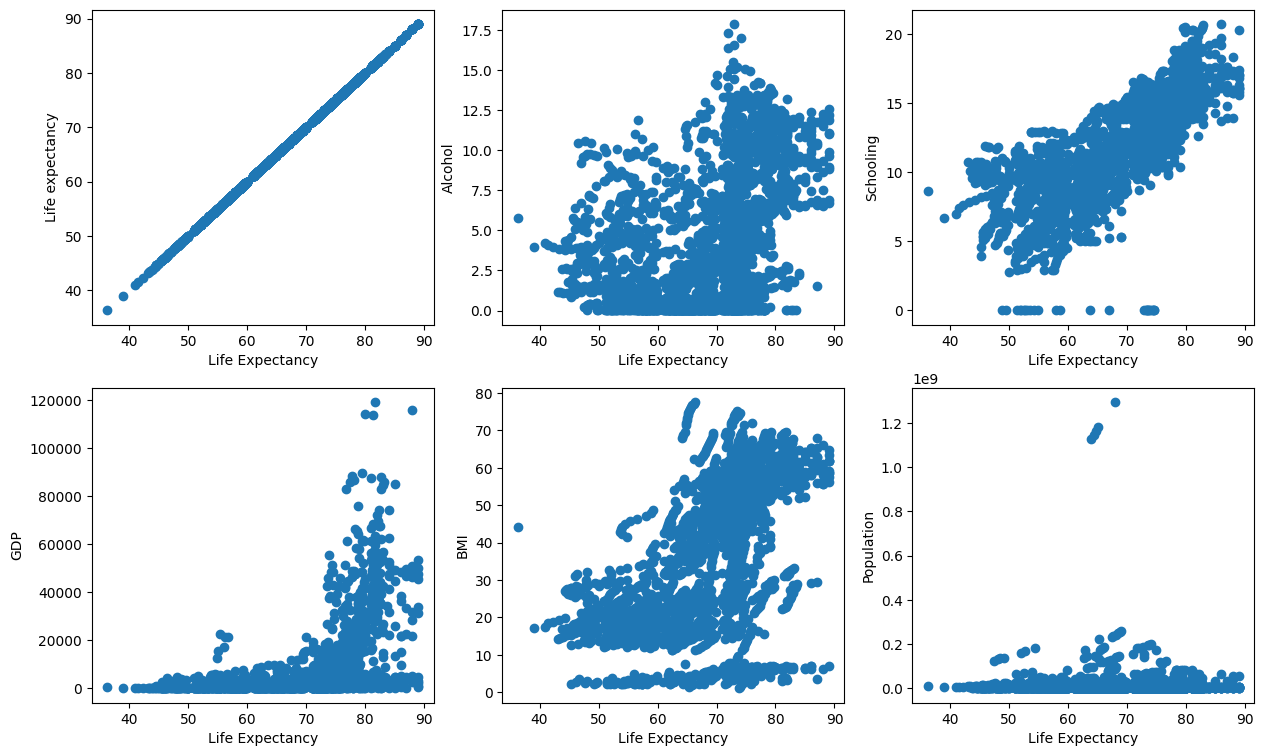

In [30]:
fig, axes = plt.subplots(figsize=(15,9), nrows=2, ncols=3)

axes = axes.flatten()

columns = df_2.columns[2:]

for ax, col in zip(axes, columns):
    plot_scatter(df_2["Life expectancy"], df_2[col], xlabel="Life Expectancy", ylabel=col, ax=ax)

plt.show()

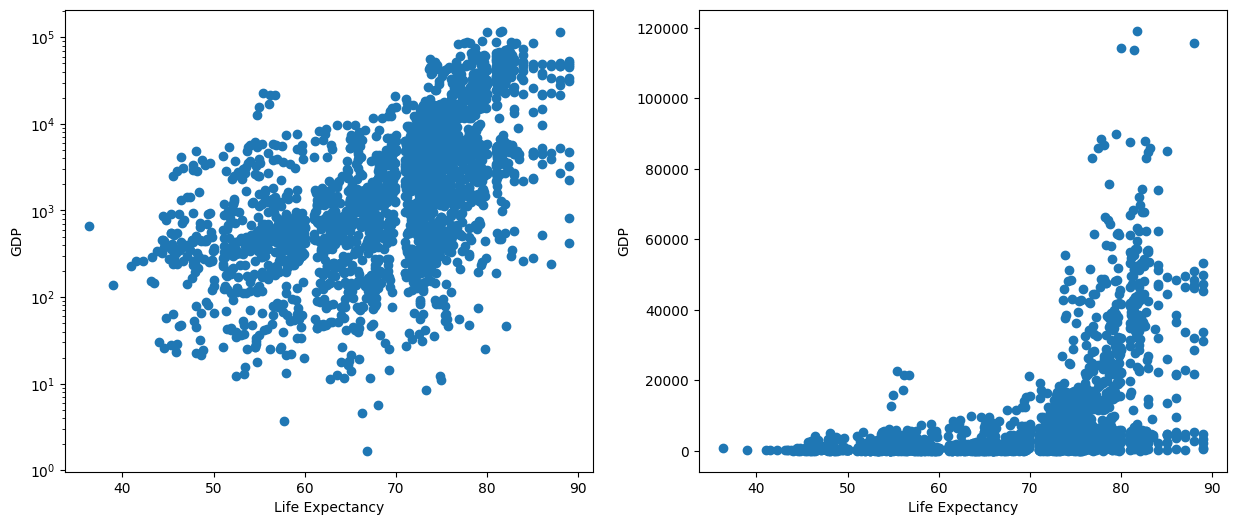

In [37]:
fig, (axes1, axes2) = plt.subplots(ncols=2, figsize=(15, 6))

axes1.scatter(df_2["Life expectancy"], df_2["GDP"])
axes1.set_xlabel("Life Expectancy")
axes1.set_ylabel("GDP")
axes1.set_yscale('log')

axes2.scatter(df_2["Life expectancy"], df_2["GDP"])
axes2.set_xlabel("Life Expectancy")
axes2.set_ylabel("GDP")
# axes1.set_yscale('log')


plt.show()

In [39]:
df_2["Life expectancy"].corr(df_2["GDP"])

0.46145519262073825

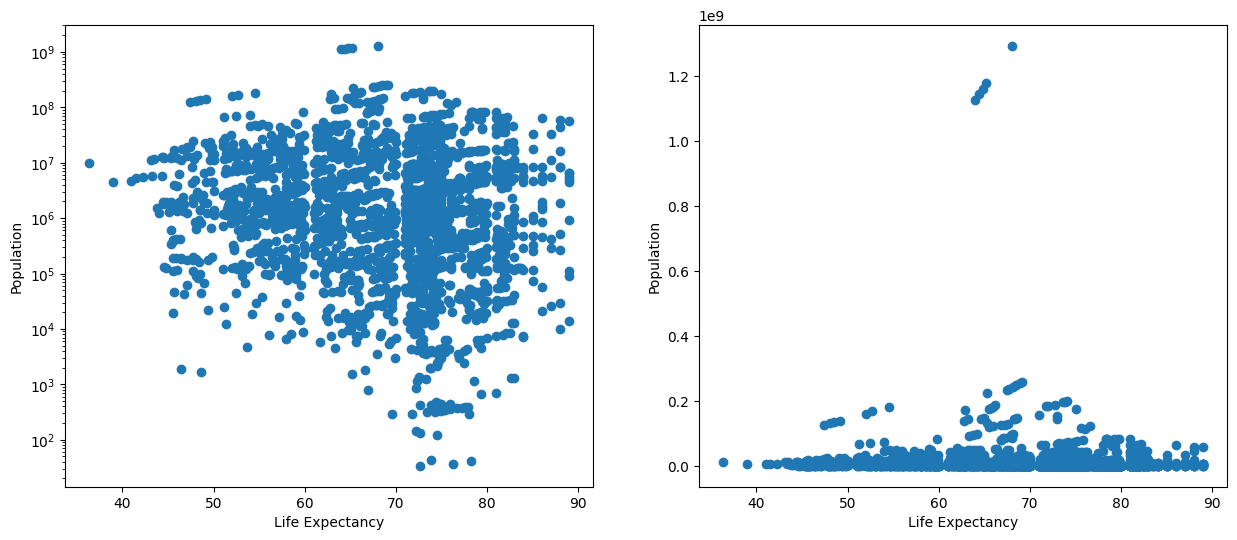

In [45]:
fig, (axes1, axes2) = plt.subplots(ncols=2, figsize=(15, 6))

axes1.scatter(df_2["Life expectancy"], df_2["Population"])
axes1.set_xlabel("Life Expectancy")
axes1.set_ylabel("Population")
axes1.set_yscale('log')

axes2.scatter(df_2["Life expectancy"], df_2["Population"])
axes2.set_xlabel("Life Expectancy")
axes2.set_ylabel("Population")
# axes1.set_yscale('log')


plt.show()

In [46]:
df_2["Life expectancy"].corr(df_2["Population"])

-0.021538108386786468

In [33]:
axes.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

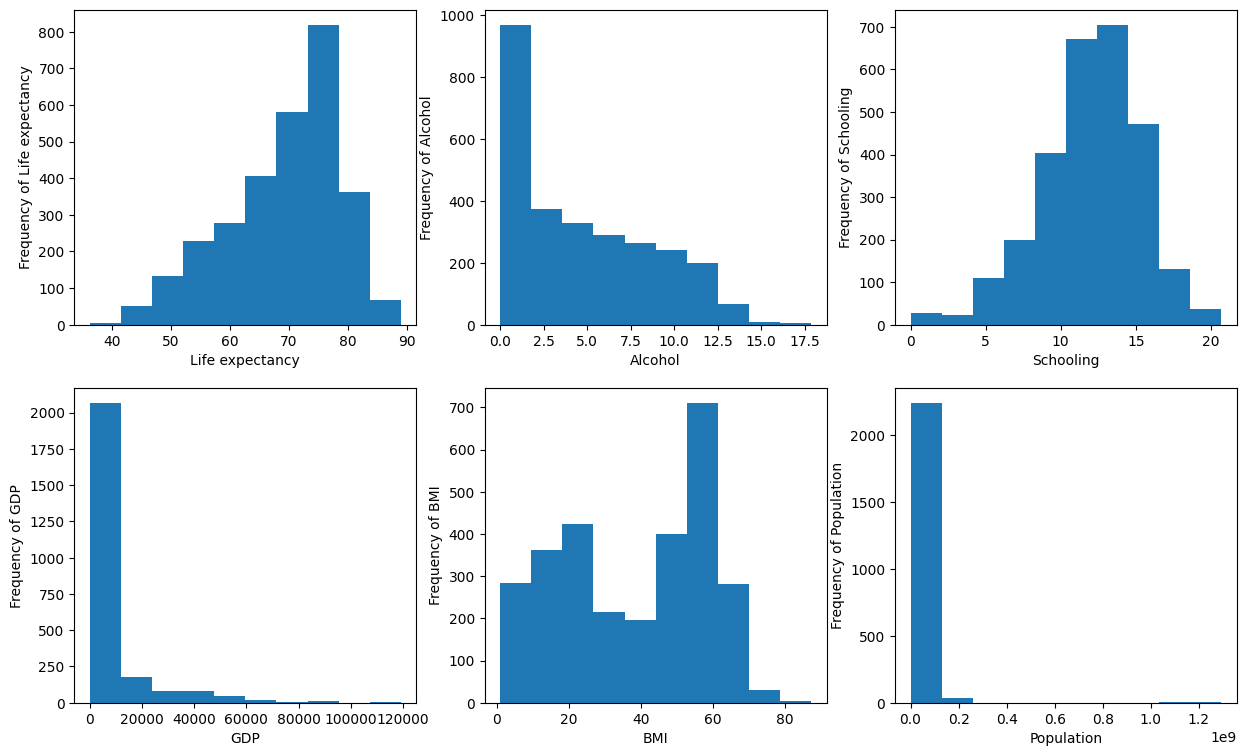

In [44]:
fig, axes = plt.subplots(figsize=(15,9), nrows=2, ncols=3)

axes = axes.flatten()

columns = df_2.columns[2:]

for ax, col in zip(axes, columns):
    plot_hist(df_2[col],col,ax)

plt.show()

In [49]:
df_2[df_2.columns[2:]].corr()

,Life expectancy,Alcohol,Schooling,GDP,BMI,Population
Life expectancy,1.000000,0.404877,0.751975,0.461455,0.567694,-0.021538
Alcohol,0.404877,1.000000,0.547378,0.354712,0.330408,-0.035252
Schooling,0.751975,0.547378,1.000000,0.448273,0.546961,-0.031668
GDP,0.461455,0.354712,0.448273,1.000000,0.301557,-0.028270
BMI,0.567694,0.330408,0.546961,0.301557,1.000000,-0.072301
Population,-0.021538,-0.035252,-0.031668,-0.028270,-0.072301,1.000000
